---
# Import Libraries
---

In [1]:
import numpy as np 
import pandas 
import csv
import warnings
import nltk
import os
import string
import time
import pickle
import random
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")
from sklearn.decomposition import KernelPCA, FastICA, PCA
from sklearn.preprocessing import StandardScaler
src='/home/shared_data/textmining_genderrecognition_topicextraction/dataset_text_mining_Reuters_RCV2/'
# src='C:/Users/matti/Desktop/progetto/Dataset/'
labels_59=True

---
# Data Upload
---

In [2]:
with open (src+'outputfile_text_processed.csv', 'r') as temp:
    processed_text_final = pandas.read_csv(temp)

In [3]:
if labels_59==True:
    y_label_code = np.loadtxt(src+'numeric_label_topic_59.txt', dtype=int)
    print(len(y_label_code))
else:
    y_label_code = np.loadtxt(src+'numeric_label_topic.txt', dtype=int)
    print(len(y_label_code))
y_label_code

800803


array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 1]])

In [4]:
y_label_code=y_label_code.tolist()
print(len(y_label_code))

800803


In [5]:
if labels_59==True:
    with open("myDictionary_labels_59.npy", "rb") as tf:
        new_dict = np.load(tf, allow_pickle='TRUE')
else:
    with open("myDictionary_labels.npy", "rb") as tf:
        new_dict = np.load(tf, allow_pickle='TRUE')
new_dict.item()

{'C11': 'STRATEGY/PLANS',
 'C12': 'LEGAL/JUDICIAL',
 'C13': 'REGULATION/POLICY',
 'C14': 'SHARE LISTINGS',
 'C15': 'PERFORMANCE',
 'C16': 'INSOLVENCY/LIQUIDITY',
 'C17': 'FUNDING/CAPITAL',
 'C18': 'OWNERSHIP CHANGES',
 'C21': 'PRODUCTION/SERVICES',
 'C22': 'NEW PRODUCTS/SERVICES',
 'C23': 'RESEARCH/DEVELOPMENT',
 'C24': 'CAPACITY/FACILITIES',
 'C31': 'MARKETS/MARKETING',
 'C32': 'ADVERTISING/PROMOTION',
 'C33': 'CONTRACTS/ORDERS',
 'C34': 'MONOPOLIES/COMPETITION',
 'C41': 'MANAGEMENT',
 'C42': 'LABOUR',
 'CCAT': 'CORPORATE/INDUSTRIAL',
 'E11': 'ECONOMIC PERFORMANCE',
 'E12': 'MONETARY/ECONOMIC',
 'E13': 'INFLATION/PRICES',
 'E14': 'CONSUMER FINANCE',
 'E21': 'GOVERNMENT FINANCE',
 'E31': 'OUTPUT/CAPACITY',
 'E41': 'EMPLOYMENT/LABOUR',
 'E51': 'TRADE/RESERVES',
 'E61': 'HOUSING STARTS',
 'E71': 'LEADING INDICATORS',
 'ECAT': 'ECONOMICS',
 'G15': 'EUROPEAN COMMUNITY',
 'GCAT': 'GOVERNMENT/SOCIAL',
 'GCRIM': 'CRIME, LAW ENFORCEMENT',
 'GDEF': 'DEFENCE',
 'GDIP': 'INTERNATIONAL RELATIONS',

In [6]:
y_label_code_column=[]
for row in y_label_code:
    lab=(''.join(map(str, row)))
    y_label_code_column.append(lab)
len(y_label_code_column)

800803

In [7]:
Data_Set=pandas.DataFrame({'text':list(processed_text_final['text']),'target':y_label_code_column})
Data_Set

,text,target
0,uk share market unlikely make much headway nex...,0000000000000000000000000000000000000000000000...
1,cbot soft red winter wheat futures closed most...,0000000000000000000000000000000000000000000000...
2,beijing friday condemned u.s. sanctions impose...,0000000000000000000000000010010100100000000000...
3,year march 31 1998 billions yen unless specifi...,0000100000000000001000000000000000000000000000...
4,pregnant ira bomb suspect released bail friday...,0000000000000000000000000000000110000000000010...
...,...,...
800798,slovenian development fund state 's restructur...,0000000100000000001000000000000000000000000000...
800799,slow development widely variable corn crop con...,0000000010010000001000000000000000000000000000...
800800,nbc series quot er quot emmy award sunday best...,0000000000000000000000000000000100001000000000...
800801,sun-diamond growers california went court mond...,0100000000000000100000000000000010000000000000...


In [8]:
# with open(src+'GCP_TEXT_AND_LABEL_PROCESSED_59.csv', 'w') as temp:
#     Data_Set.to_csv(temp, index=False)

---
# REDUCTION DATASET
---

In [9]:
from datetime import datetime
def time_calculate(bool_t=True,start_time=0):
    if bool_t==True:
        print('START: ',datetime.today().strftime('%Y-%m-%d %H:%M'))
        return time.time()
    else:
        end_time=time.time()
        print('END: ',datetime.today().strftime('%Y-%m-%d %H:%M'))
        giorno_in_sec=86400
        giorni=(int(end_time)-int(start_time))//giorno_in_sec
        t = time.strftime("%Hh:%Mm:%Ss",time.gmtime(int(end_time)-int(start_time)))
        print("tempo impiegato "+str(giorni)+'d:'+t)
        return t
def plot_token_occ(x,start,end, genere,title):
    token_lens = []
    for txt in x:
        txt_l=(str(txt)).split(' ')
        token_lens.append(len(txt_l))
    media=np.mean(token_lens)
    sns.histplot(token_lens)
    plt.xlim([start,end])
    plt.xlabel('Text count')
    plt.title(title+genere+" ="+ str(round(media,2)))
    plt.show()

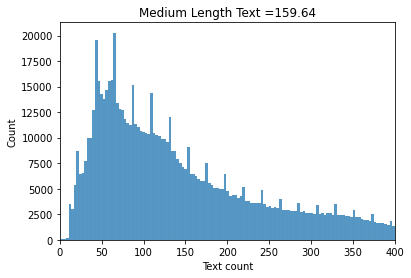

In [10]:
plot_token_occ(Data_Set['text'].tolist(),0,400,'','Medium Length Text')

In [11]:
delete=0
start_row=35
end_row=150 #len(Data_Set)
print('prima--->',len(Data_Set),'!')
start_time=time_calculate()
delete=len(Data_Set[(Data_Set['text'].map(lambda x: len(x.split(' ')))> end_row) ])+len(Data_Set[(Data_Set['text'].map(lambda x: len(x.split(' ')))< start_row)])
Data_Set = Data_Set[(Data_Set['text'].map(lambda x: len(x.split(' ')))<= end_row) ]
Data_Set = Data_Set[(Data_Set['text'].map(lambda x: len(x.split(' ')))>= start_row) ]
Data_Set = Data_Set.reset_index(drop=True)
end_time=time_calculate(bool_t=False,start_time=start_time)
print('ora--->',len(Data_Set),', eliminati',delete,'record su',800803 ,'!')

prima---> 800803 !
START:  2022-02-27 01:56
END:  2022-02-27 01:58
tempo impiegato 0d:00h:01m:18s
ora---> 439176 , eliminati 361627 record su 800803 !


In [12]:
def crea_label_vector(Data_Set):
    y_label_code_reduced=[]
    for index, row in Data_Set.iterrows():
        row_t=(list(row['target']))
        row_t=[int(x) for x in row_t]
        y_label_code_reduced.append(row_t)
    print('size ridotta',len(y_label_code_reduced))
    return y_label_code_reduced
class_names_list=new_dict.item()
target_names=[x for x in class_names_list.keys()]
y_label_code_reduced=crea_label_vector(Data_Set)

size ridotta 439176


---
## Check that there are enough examples and balance the labels
---

In [13]:
def stat_ds(y_label_code_reduced):
    x=np.zeros(len(y_label_code_reduced[0]),dtype=int)
    for v in y_label_code_reduced:
        x=x+v
    c=0
    for v in x:
        if v==0:
            c+=1
    print(x)
    print('esempi = 0 :',c)
    #percentuali sull'intero dataset
    xx=x.copy()
    z=[]
    for l in xx:
        z.append(str(round((l/len(Data_Set))*100,2))+'%')
    print(z)
    return x#,[float(x[:4]) for x in z]
    
stat_ds_list=stat_ds(y_label_code_reduced)  

[ 13361   5551  17971   5193 103562   1099  29159  33986  14754   3645
   1553  18998  21455    831  11067   2140   7937   5680 241052   3408
  11588   3878   1120  21222   1296   8306   9384    170    508  55102
   7877  93065  13457   2873  11469   4773   1228   2510     83   2395
   8326      4    390   1686  17135   1928    866    690  14836    329
   9850   2929   2186    722  21357  11237  29883  49077 107149]
esempi = 0 : 0
['3.04%', '1.26%', '4.09%', '1.18%', '23.58%', '0.25%', '6.64%', '7.74%', '3.36%', '0.83%', '0.35%', '4.33%', '4.89%', '0.19%', '2.52%', '0.49%', '1.81%', '1.29%', '54.89%', '0.78%', '2.64%', '0.88%', '0.26%', '4.83%', '0.3%', '1.89%', '2.14%', '0.04%', '0.12%', '12.55%', '1.79%', '21.19%', '3.06%', '0.65%', '2.61%', '1.09%', '0.28%', '0.57%', '0.02%', '0.55%', '1.9%', '0.0%', '0.09%', '0.38%', '3.9%', '0.44%', '0.2%', '0.16%', '3.38%', '0.07%', '2.24%', '0.67%', '0.5%', '0.16%', '4.86%', '2.56%', '6.8%', '11.17%', '24.4%']


In [14]:
def _red_list_bal(y_label_code_reduced):
    c=stat_ds(y_label_code_reduced)
    min_l=min(c)
    red=[0,0,0,0]
    ind=0
    for i in c:
        if i!=min_l:
            val=c[ind]#int((i/100)*len(Data_Set))
            red[ind]=val-min_l#int((min_l/100)*len(Data_Set))
        else:
            red[ind]=1
        ind+=1
    return red

In [15]:
def indx_permutati(Data_Set):
    random.seed(42)
    ind_ds=random.sample(range(len(Data_Set)), len(Data_Set))
    return ind_ds

In [16]:
def bilancia(Data_Set):
    size_prima=len(Data_Set)
    conta1=0
    conta2=0
    conta3=0
    conta4=0
    index=0
    red=_red_list_bal(y_label_code_reduced)
    indx_perm=indx_permutati(Data_Set)
    index_list=[]
    row_list=Data_Set['target'].tolist()
    for row_ind in indx_perm:
        row=row_list[row_ind]
        row_t=[int(x) for x in row]
        if sum(row_t)==1:
            if row_t[0]==1 and conta1<red[0]:
                index_list.append(row_ind)
                conta1+=1
            if row_t[1]==1 and conta1<red[1]:
                index_list.append(row_ind)
                conta2+=1
            if row_t[2]==1 and conta3<red[2]:
                index_list.append(row_ind)
                conta3+=1
            if row_t[3]==1 and conta4<red[3]:
                index_list.append(row_ind)
                conta4+=1
        
        index+=1
        if index%100000==0 and index!=0:
            print('analizzati',index)
    Data_Set.drop(index_list, inplace=True)
    Data_Set.reset_index(drop=True)
    print('eliminati come prima label',conta1,'\neliminati come seconda label',conta2,'\neliminati come terza label',conta3,'\neliminati come quarta label',conta4,'\nsize ridotta da',size_prima,'a',len(Data_Set))

start_time=time_calculate()
if labels_59!=True:
    bilancia(Data_Set)
else:
    random.seed(42)
    ind_ds=random.sample(range(len(Data_Set)), int(len(Data_Set)/1.5))
    Data_Set.drop(ind_ds, inplace=True)
    Data_Set=Data_Set.reset_index(drop=True)
end_time=time_calculate(bool_t=False,start_time=start_time)

START:  2022-02-27 02:02
END:  2022-02-27 02:02
tempo impiegato 0d:00h:00m:04s


In [17]:
y_label_code_reduced=crea_label_vector(Data_Set)
stat_ds(y_label_code_reduced)

size ridotta 146392
[ 4483  1815  5958  1701 34427   371  9714 11417  4944  1167   516  6320
  7167   279  3649   685  2606  1927 80219  1171  3874  1292   355  7083
   443  2794  3173    56   183 18480  2647 31102  4496   962  3889  1606
   436   835    35   809  2788     1   139   602  5751   623   254   227
  4984   104  3254   977   735   233  7197  3715  9894 16292 35617]
esempi = 0 : 0
['3.06%', '1.24%', '4.07%', '1.16%', '23.52%', '0.25%', '6.64%', '7.8%', '3.38%', '0.8%', '0.35%', '4.32%', '4.9%', '0.19%', '2.49%', '0.47%', '1.78%', '1.32%', '54.8%', '0.8%', '2.65%', '0.88%', '0.24%', '4.84%', '0.3%', '1.91%', '2.17%', '0.04%', '0.13%', '12.62%', '1.81%', '21.25%', '3.07%', '0.66%', '2.66%', '1.1%', '0.3%', '0.57%', '0.02%', '0.55%', '1.9%', '0.0%', '0.09%', '0.41%', '3.93%', '0.43%', '0.17%', '0.16%', '3.4%', '0.07%', '2.22%', '0.67%', '0.5%', '0.16%', '4.92%', '2.54%', '6.76%', '11.13%', '24.33%']


array([ 4483,  1815,  5958,  1701, 34427,   371,  9714, 11417,  4944,
        1167,   516,  6320,  7167,   279,  3649,   685,  2606,  1927,
       80219,  1171,  3874,  1292,   355,  7083,   443,  2794,  3173,
          56,   183, 18480,  2647, 31102,  4496,   962,  3889,  1606,
         436,   835,    35,   809,  2788,     1,   139,   602,  5751,
         623,   254,   227,  4984,   104,  3254,   977,   735,   233,
        7197,  3715,  9894, 16292, 35617])

---
# Tif idf vectorizer
---

In [18]:
pandas.DataFrame({'text':list(Data_Set['text']),'target':y_label_code_reduced})

,text,target
0,year march 31 1998 billions yen unless specifi...,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,pregnant ira bomb suspect released bail friday...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,millfeed prices mostly steady friday ahead u.s...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,year march 31 1998 billions yen unless specifi...,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,britain 's peninsular amp oriental steam navig...,"[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
146387,shenzhen stock exchange launch several financi...,"[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
146388,scattered rains brought relief parched montana...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
146389,carolina power amp light co plans restart 767 ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
146390,last quotes international securities market as...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [19]:
# prima splitta in train test
X = list(Data_Set['text'])
y = y_label_code_reduced
if labels_59==True:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
    X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.33, random_state=42)
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42,stratify=y)
    X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.33, random_state=42,stratify=y_test)
print('Size iniziale dei record:',len(list(Data_Set['text'])),'\nSize train ds:',len(X_train),', Size train label:', len(y_train),'\nSize validation ds:',len(X_validation),', Size validation label:',len(y_validation),'\nSize test ds:',len(X_test),'Size test label:', len(y_test))

Size iniziale dei record: 146392 
Size train ds: 102474 , Size train label: 102474 
Size validation ds: 29425 , Size validation label: 29425 
Size test ds: 14493 Size test label: 14493


In [20]:
print("Tf-idf")
tfizer = TfidfVectorizer(analyzer="word",
                          lowercase=True,
                          max_features=3000,
                          tokenizer=None,
                          preprocessor=None,
                          stop_words='english',
                          dtype=np.float32
#                           max_df=0.3,
#                           min_df=0.1
                          )

start_time=time_calculate()
X_tfidf =  tfizer.fit_transform(X_train)

X_tfidf_validation = tfizer.transform(X_validation)

X_tfidf_test = tfizer.transform(X_test)
end_time=time_calculate(bool_t=False,start_time=start_time)

print('Size train vettore_ds:',X_tfidf.shape,
      '\nSize validation vettore_ds:',X_tfidf_validation.shape,
      '\nSize test vettore_ds:',X_tfidf_test.shape)

Tf-idf
START:  2022-02-27 02:04
END:  2022-02-27 02:05
tempo impiegato 0d:00h:00m:51s
Size train vettore_ds: (102474, 3000) 
Size validation vettore_ds: (29425, 3000) 
Size test vettore_ds: (14493, 3000)


In [21]:
def controlla_features_prodotte(controlla):
    val=1
    if controlla:
        i=0
        righe_assenti_di_features=0
        for row in X_tfidf:
            row_uniq=np.unique(row.toarray()[0])
            if (len(row_uniq))<=val:
                righe_assenti_di_features+=1
                print('Indice',i,'attributi diversi da 0:',row_uniq[0])
            i+=1
        print('righe assenti di features:',righe_assenti_di_features)
start_time=time_calculate()
controlla_features_prodotte(False)
end_time=time_calculate(bool_t=False,start_time=start_time)

START:  2022-02-27 02:05
END:  2022-02-27 02:05
tempo impiegato 0d:00h:00m:00s


In [22]:
# def create_df(x_df,y_,pat):
#     df = pandas.DataFrame()  
#     df['text']=list(x_df.toarray())
#     df['topic']=y_

#     res=[]
#     for x in (list(df['topic'])):
#         xx=list(x)
#         r=''
#         c_list=list(class_names_list.keys())
#         for i in range (len(c_list)):
#             if xx[i]==1:
#     #             r.append(c_list[i])
#                r=r+(c_list[i])+','     
#         res.append(r[:len(r)-1])
#     df['topic']=res
#     with open(src+pat, 'w') as temp:
#         df.to_csv(temp, index=False)
# create_df(X_tfidf,y_train,'X_tfidf_train.csv')
# create_df(X_tfidf_validation,y_validation,'X_tfidf_validation.csv')
# create_df(X_tfidf_test,y_test,'X_tfidf_test.csv')

---
# PCA
---

START:  2022-02-27 02:05
END:  2022-02-27 02:05
tempo impiegato 0d:00h:00m:00s


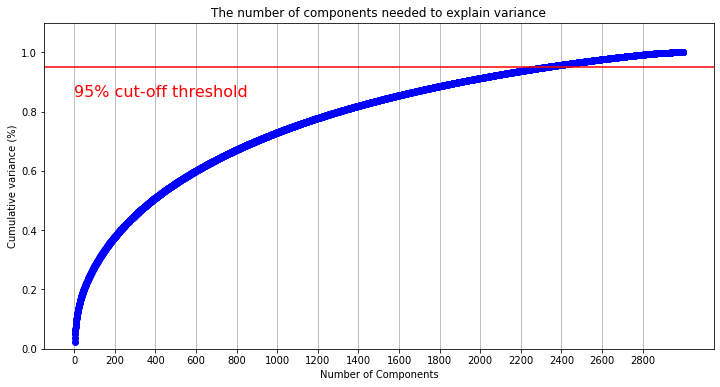

In [23]:
path_pca="/home/mattia_gatto/text-mining-use-cases/src/use_cases/use_case_topic_classification/Models/PCA/"
# path_pca='C:/Users/matti/Desktop/progetto/text-mining-use-cases-mattia_gatto/src/use_cases/use_case_topic_classification/Models/PCA/'
# PCA
start_time=time_calculate()
if labels_59!=True:
    fp=path_pca+'pca'
else:
    fp=path_pca+'pca_59'
if os.path.isfile(fp):
    pca = pickle.load(open(fp, 'rb'))
else:
    pca = PCA().fit(X_tfidf.toarray())
    pickle.dump(pca, open(fp, 'wb'))
end_time=time_calculate(bool_t=False,start_time=start_time)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, (X_tfidf.shape[1]+1), step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, X_tfidf.shape[1], step=200)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [24]:
del pca

Number of components = 2300

In [25]:
n_compon=2300

# PCA
start_time=time_calculate()
if labels_59!=True:
    f1=path_pca+'X_tfidf_pca'
else:
    f1=path_pca+'X_tfidf_pca_59'
    
if os.path.isfile(f1):
    X_tfidf_pca = pickle.load(open(f1, 'rb'))
else:
    X_tfidf_pca = PCA(n_components=n_compon).fit_transform(X_tfidf.toarray())
    pickle.dump(X_tfidf_pca, open(f1, 'wb'))
end_time=time_calculate(bool_t=False,start_time=start_time)

start_time=time_calculate()
if labels_59!=True:
    f2=path_pca+'X_tfidf_validation_pca'
else:
    f2=path_pca+'X_tfidf_validation_pca_59'

if os.path.isfile(f2):
    X_tfidf_validation_pca = pickle.load(open(f2, 'rb'))
else:
    X_tfidf_validation_pca = PCA(n_components=n_compon).fit_transform(X_tfidf_validation.toarray())
    pickle.dump(X_tfidf_validation_pca, open(f2, 'wb'))
end_time=time_calculate(bool_t=False,start_time=start_time)

start_time=time_calculate()
if labels_59!=True:
    f3=path_pca+'X_tfidf_test_pca'
else:
    f3=path_pca+'X_tfidf_test_pca_59'


if os.path.isfile(f3):
    X_tfidf_test_pca = pickle.load(open(f3, 'rb'))
else:
    X_tfidf_test_pca = PCA(n_components=n_compon).fit_transform(X_tfidf_test.toarray())
    pickle.dump(X_tfidf_test_pca, open(f3, 'wb'))

end_time=time_calculate(bool_t=False,start_time=start_time)

START:  2022-02-27 02:05
END:  2022-02-27 02:06
tempo impiegato 0d:00h:00m:49s
START:  2022-02-27 02:06
END:  2022-02-27 02:06
tempo impiegato 0d:00h:00m:03s
START:  2022-02-27 02:06
END:  2022-02-27 02:06
tempo impiegato 0d:00h:00m:01s


In [26]:
del X_tfidf
del X_tfidf_validation
del X_tfidf_test

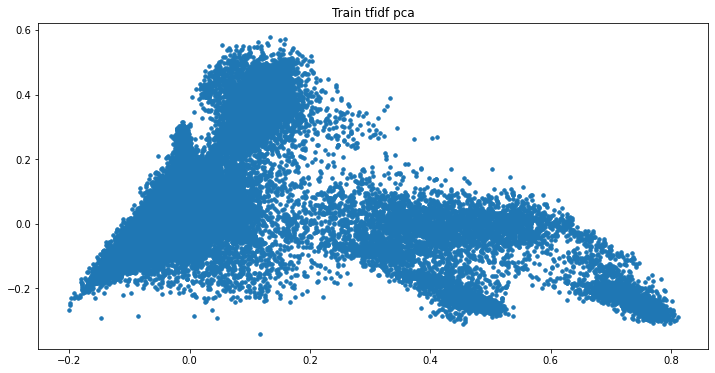

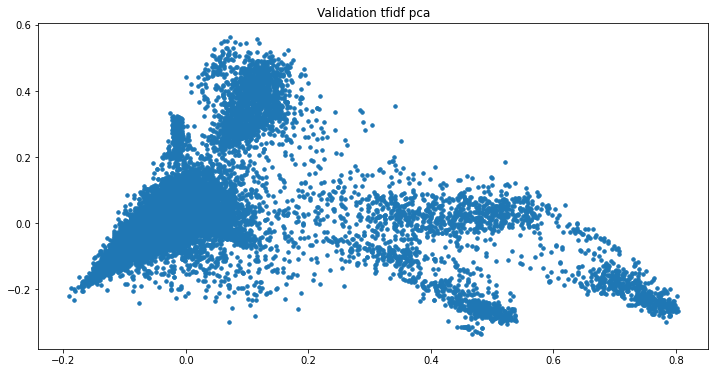

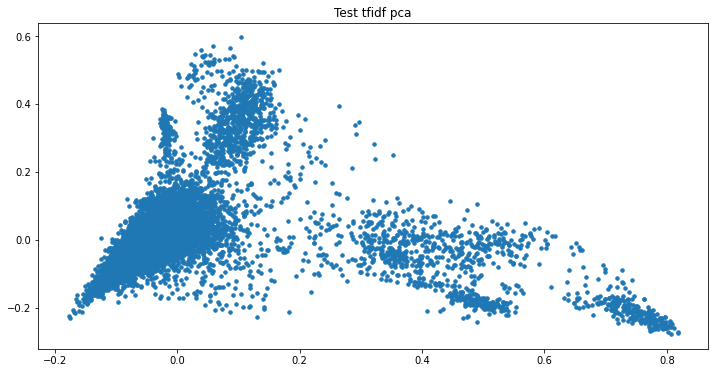

In [27]:
# Plot
plt.figure(1)
plt.scatter(X_tfidf_pca[:,0], X_tfidf_pca[:,1], cmap=plt.get_cmap('tab20'), s=12)
plt.title("Train tfidf pca")
plt.figure(2)
plt.scatter(X_tfidf_validation_pca[:,0], X_tfidf_validation_pca[:,1], cmap=plt.get_cmap('tab20'), s=12)
plt.title("Validation tfidf pca")
plt.figure(3)
plt.scatter(X_tfidf_test_pca[:,0], X_tfidf_test_pca[:,1], cmap=plt.get_cmap('tab20'), s=12)
plt.title("Test tfidf pca")
plt.show()